# Data Visualization with Python

This document contains my consolidated notes and code snippets for using Python (and associated libraries) for data visualization.

## Table of Contents
1. __[Matplotlib](#matplotlib)__
    - [Simple 2D Plots](#2d)
    - [Object Oriented 2D Plots](#oo2d)
    - [Saving Figures](#save)
    - [Line and Marker Styles](#style)
    - [Custom Range, Scale, and Axes](#rsa)
    - [Text Annotation](#text)
    - [Complex Subplots](#subplot)
    - [Colormaps, Contours, 3D](#cmct3d)  
1. __[Seaborn](#seaborn)__

<a id='matplotlib'></a>
# Matplotlib

Below are some basic Matplotlib code samples that I find useful, other rad Matplotlib resources include...

- Matplotlib.org: http://matplotlib.org/
- Matplotlib.org Gallery Shows the Variety of Chart Types Avialable: http://matplotlib.org/gallery.html
- Matplotlib.org Color Maps Guide: https://matplotlib.org/users/colormaps.html
- Tight Layout Guide: https://matplotlib.org/users/tight_layout_guide.html
- This Tutorial: http://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots

In [2]:
# Import the pyplot module
import matplotlib.pyplot as plt

# Add some magic so plots are visible in Jupyter notebook...
% matplotlib inline

#### Pyplot vs. Pylab Modules

From the [Matplotlib FAQ Page](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related):

> __Pyplot:__ provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot....

> __Pylab:__ combines the pyplot functionality (for plotting) with the numpy functionality (for mathematics and for working with arrays) in a single namespace, making that namespace (or environment) even more MATLAB-like. For example, one can call the sin and cos functions just like you could in MATLAB, as well as having all the features of pyplot.

> __The pyplot interface is generally preferred__ for non-interactive plotting (i.e., scripting). __The pylab interface is convenient__ for interactive calculations and plotting, as it minimizes typing.

## Create some datasets for simple plotting

In [4]:
import numpy as np

# Create 11 equally spaced points from 0 to 5
x = np.linspace(0, 5, 11)

# Transform x for y
y = x ** 2

<a id='2d'></a>
## Create 2D Simple Plots

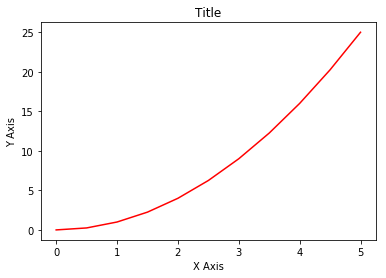

In [5]:
plt.plot(x, y, 'red') # 'red' can also be abbreviated as 'r'
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Title')
plt.show()

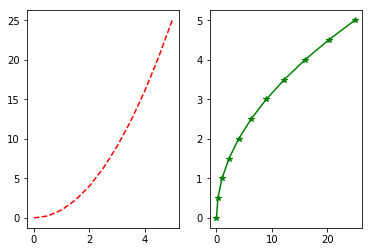

In [6]:
plt.subplot(1,2,1) # plt.subplot(nrows, ncols, plot_number)
plt.plot(x, y, 'r--') # red dashed line
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-'); # green dashed line

# Ending code with ';' suppresses data output 
#   ...Doing so makes for a cleaner plot

<a id='oo2d'></a>
## Object Oriented 2D Plots

This approach improves usability when making more complex plots or dealing with a canvas and multiple plots.

Code is more complicated, but we have full control the plot axes and can add more than one axis to the figure.

### Basic Example

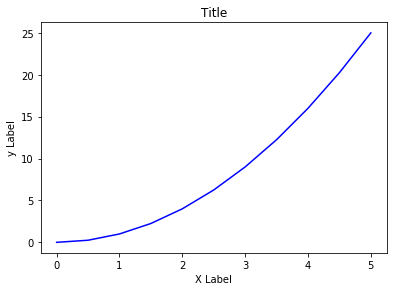

In [9]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
# ...left, bottom, width, height [0,1]

# Plot on the axes
axes.plot(x, y, 'blue')
axes.set_xlabel('X Label') # Use .set_ to begin methods!
axes.set_ylabel('y Label')
axes.set_title('Title');

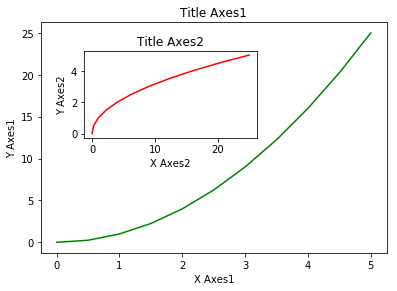

In [10]:
# Create blank canvas
fig = plt.figure()

# Create main axes
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Create inset axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# Main Figure
axes1.plot(x, y, 'g')
axes1.set_xlabel('X Axes1')
axes1.set_ylabel('Y Axes1')
axes1.set_title('Title Axes1')

# Inset Figure
axes2.plot(y, x, 'r')
axes2.set_xlabel('X Axes2')
axes2.set_ylabel('Y Axes2')
axes2.set_title('Title Axes2');

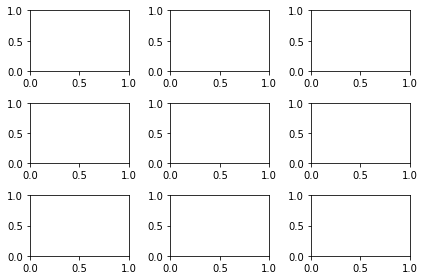

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=3)

# Add tight_layout -- it eliminates object overlap!
plt.tight_layout()

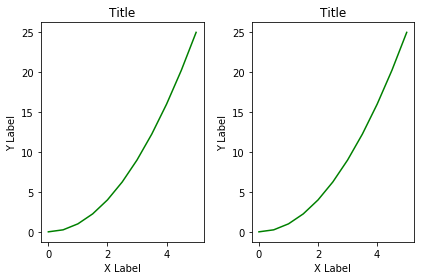

In [16]:
# 'axes' is an array of axes that we can 
#    iterate through with a for loop...

fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_title('Title')

# Display figure object    
fig.tight_layout();

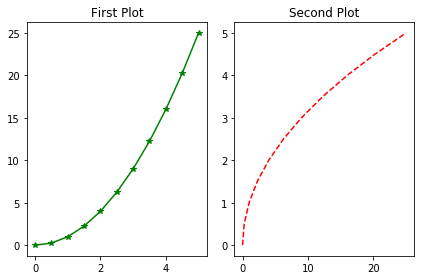

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(x,y,'g*-')
axes[0].set_title('First Plot')

axes[1].plot(y,x,'r--')
axes[1].set_title('Second Plot')

plt.tight_layout();

### Aspect ratio and DPI can be specified when creating the fig object

```py
fig = plt.figure(figsize=(8,4),dpi=100) 
# figsize(width,height) is in inches
```

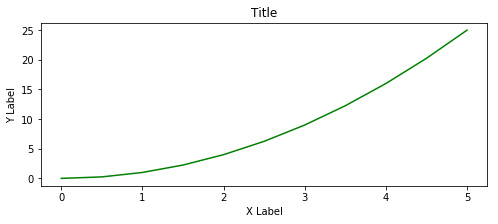

In [26]:
# Figsize and DPI can also be passed to the layout manager...

fig, axes = plt.subplots(figsize=(8,3))

axes.plot(x, y, 'g')
axes.set_xlabel('X Label')
axes.set_ylabel('Y Label')
axes.set_title('Title');

<a id='save'></a>
## Saving Figures

Output formats include PNG, JPG, EPS, SVG, PGF and PDF
```py
fig.savefig("filename.png", dpi=200)
```

<a id='stlye'></a>
## Line and Marker Styles

1. `color` can be either color name or RGB hex code
1. `alpha` sets transparency [0,1]
1. `linewidth` or `lw`
1. `linestyle` or `ls`
1. `marker`
1. `markersize`
1. `markerfacecolor`
1. `markeredgewidth`
1. `markeredgecolor`

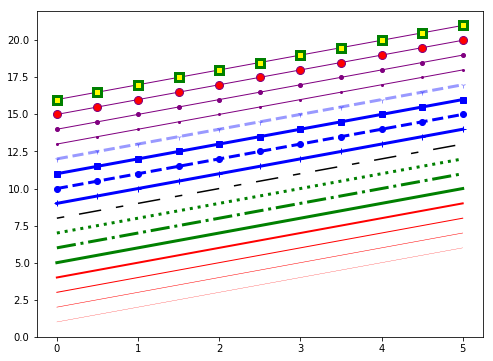

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestyle options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) 
# ...format: line length, space length, ...

# possible marker symbols: marker = 
#  '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", alpha=0.4, lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', 
        marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', 
        marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', 
        marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', 
        marker='s', markersize=8, markerfacecolor="yellow", 
        markeredgewidth=3, markeredgecolor="green");

<a id='rsa'></a>
## Custom Range, Scale, and Axes

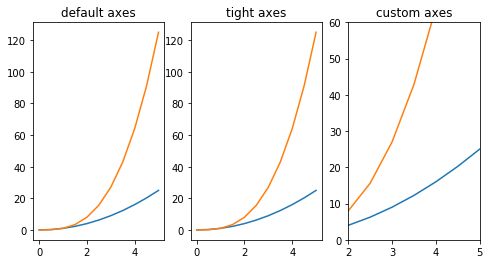

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes");

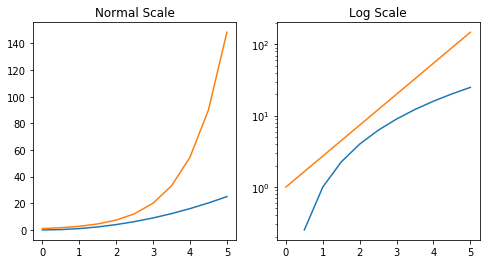

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal Scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Log Scale");

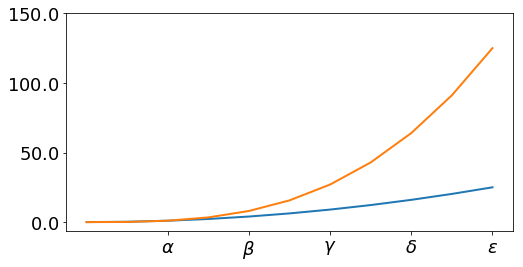

In [32]:
# Custom tick placement and custom tick labels

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', 
                    r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], 
                   fontsize=18); # use LaTeX formatted labels

### Axis Grids

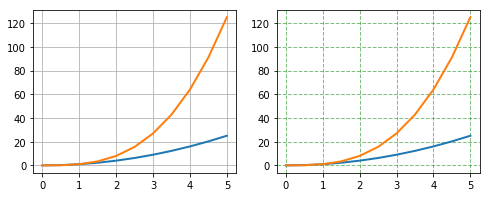

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))

# default grid
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='g', alpha=0.5, linestyle='dashed', linewidth=1)

### Axis Spines

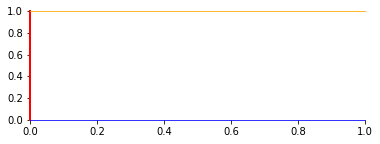

In [37]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('orange')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only show ticks on left spine

### Twin Axes

Can use either:
- `twinx`
- `twiny`

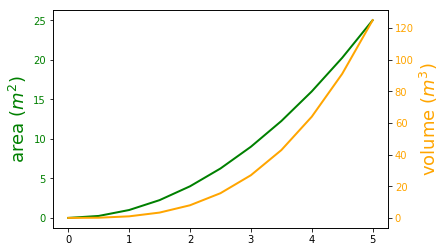

In [40]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="green")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="green")
for label in ax1.get_yticklabels():
    label.set_color("green")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="orange")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="orange")
for label in ax2.get_yticklabels():
    label.set_color("orange")

### Set Axes to Zero

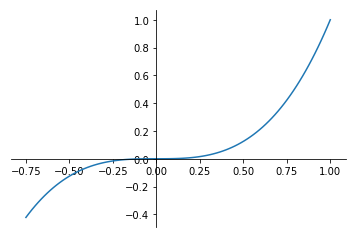

In [43]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

<a id='text'></a>
## Text Annotation

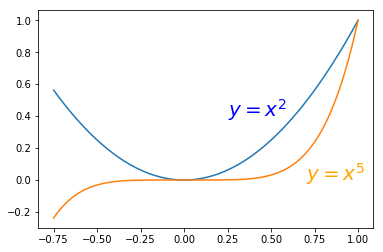

In [53]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**5)

ax.text(0.25, 0.4, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.7, 0.0, r"$y=x^5$", fontsize=20, color="orange");

# Text is positioned based on axes position (x,y)
# The text function also supports LaTex formatting

<a id='subplot'></a>
## Complex Subplot Layouts

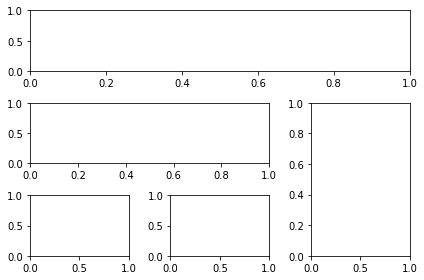

In [54]:
# subplot2grid example

fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

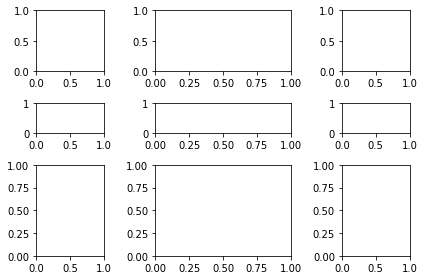

In [68]:
# Or arrange based on relative ratios using gridspec module

import matplotlib.gridspec as gridspec

fig = plt.figure()

gs = gridspec.GridSpec(3, 3, height_ratios=[2,1,3], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### Creating Insets/Details with additional axes

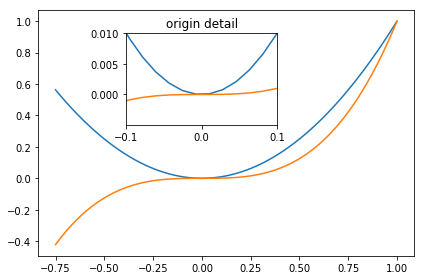

In [67]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.3, 0.55, 0.35, 0.32]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('origin detail')

# set axis range
inset_ax.set_xlim(-.05, .05)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

<a id='cmct3d'></a>
## Colormaps, Contours, and 3D 

In [70]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) \
    - alpha * np.cos(phi_ext - 2*phi_p)

In [71]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

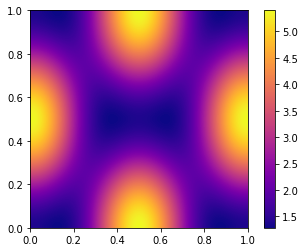

In [74]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap='plasma', vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

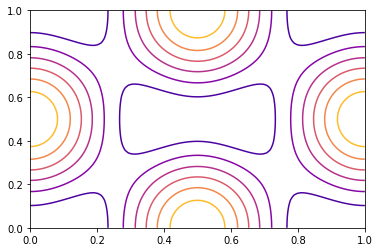

In [75]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap='plasma', 
                 vmin=abs(Z).min(), vmax=abs(Z).max(), 
                 extent=[0, 1, 0, 1])

In [76]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

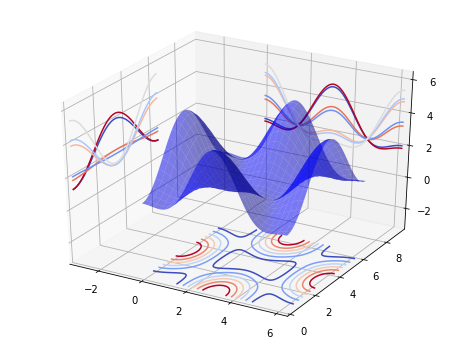

In [84]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.5, color='blue')
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap='coolwarm')
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap='coolwarm')
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap='coolwarm')

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

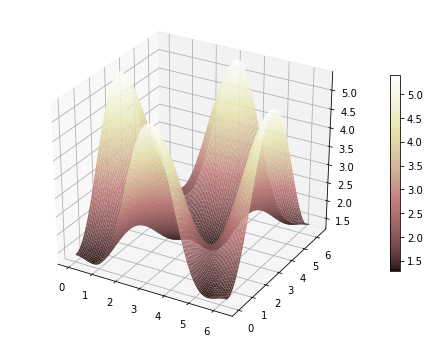

In [96]:
fig = plt.figure(figsize=(8,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                    cmap='pink', linewidth=3, antialiased=True)
cb = fig.colorbar(p, shrink=0.6)

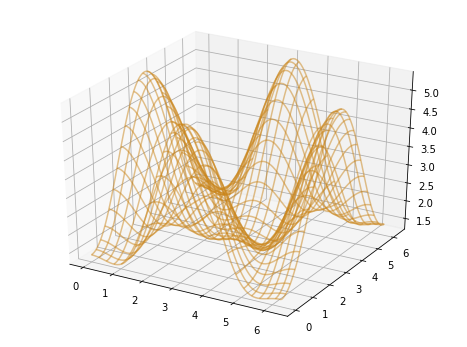

In [105]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, color='#CA851A', alpha=0.5,
                      rstride=4, cstride=4)